# Task 1: Data Preparation

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.

Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.cbook import boxplot_stats
from pandas.plotting import scatter_matrix

In [4]:
# Load the data from the file NBA_players_stats.csv using pandas library.
file_name = "NBA_players_stats.csv"
data = pd.read_csv(file_name, header=0)
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800


In [30]:
# Get all bad values
data['Pos'] = data['Pos'].str.upper() #Since field is all uppercase
data['Pos'] = data['Pos'].str.strip()

def print_bad_pos(position_list):
    valid_positions = ["PF", "PG", "C", "SG", "SF", "PG-SG", "SF-PF"]
    for i in range(len(position_list)):
        pos = position_list[i]
        if pos not in valid_positions:
            print("Invalid Position found. Check entry : " + str(i - 1))
            print(pos)
pos_list = data['Pos']

print_bad_pos(pos_list)


def print_bad_age(age_list):
    min_age = 19 # No NBA player can be signed before 19 years of age
    max_age = 50 # Standard retirement age for NBA
    for i in range(len(age_list)):
        age = age_list[i]
        if age < min_age or age > max_age:
            print("Invalid age found. Check entry " + str(age))
            print(age)
print_bad_age(data['Age'])


data['Tm'] = data['Tm'].str.upper() #Since field is all uppercase
data['Tm'] = data['Tm'].str.strip()

def print_bad_team(team_list):
    valid_teams = ["MIA", "MIL", "NOP", "SAS", "PHO", "MEM", "TOT", "BRK",
    "CLE", "ORL", "LAL", "POR", "TOR", "CHI", "WAS", "UTA", "SAC", "CHO", "NYK", "DEN", "LAC",
    "GSW", "OKC", "MIN", "DET", "DAL", "IND", "ATL", "PHI", "BOS", "HOU"]
    for i in range(len(team_list)):
        team = team_list[i]
        if team not in valid_teams:
            print("Invalid team value found. Check entry : " + str(i))
            print(team)
            
print_bad_team(data['Tm'])


def print_bad_game(game_list):
    max_games = 82
    for i in range(len(game_list)):
        game = game_list[i]
        if game > 82:
            print("Invalid Game found. Check entry : " + str(i))
            print(game)
            
print_bad_game(data['G'])


def print_negative_number(number_list):
    for i in range(len(number_list)):
        n = number_list[i]
        if n < 0:
            print("Invalid number found. Check entry : " + str(i))
            print(n)

print_negative_number(data['G'])
print_negative_number(data['GS'])
print_negative_number(data['MP'])
print_negative_number(data['FG'])
print_negative_number(data['FGA'])
print_negative_number(data['FG%'])
print_negative_number(data['3P'])
print_negative_number(data['3PA'])

def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

def print_bad_3pts_percentage():
    temp_data = pd.DataFrame(data, columns = ['3P', '3PA', '3P%'])
    temp_data['expected_3P%'] = (temp_data['3P'] / temp_data['3PA']).round(3)
    temp_data['result'] = temp_data['3P%'].eq(temp_data['expected_3P%']) | np.isclose(temp_data['3P%'], 
                                                                                      temp_data['expected_3P%'], rtol = .01)
    #print(temp_data)
    for i in range(len(temp_data['result'])):
        result = temp_data['result'][i]
        if result == False:
            if np.isnan(data['3P%'][i]): # Ignore NaN values
                continue
            print("Invalid 3P% found. Check entry : " + str(i + 2))
            print(temp_data.loc[i])
            #print(data['3P%'][i])
        
print_bad_3pts_percentage()
    
print_negative_number(data['3P%'])

print_negative_number(data['2P'])
print_negative_number(data['2PA'])
print_negative_number(data['2P%'])
print_negative_number(data['FT'])
print_negative_number(data['FTA'])
print_negative_number(data['FT%'])
print_negative_number(data['ORB'])
print_negative_number(data['DRB'])

def print_bad_rebounds(trb_list):
    orb = data['ORB']
    drb = data['DRB']
    for i in range(len(trb_list)):
        expected_trb = orb[i] + drb[i]
        trb = trb_list[i]
        if trb != expected_trb:
            print("Invalid TRB found. Check entry : " + str(i))
print_bad_rebounds(data['TRB'])

print_negative_number(data['TRB'])
print_negative_number(data['AST'])
print_negative_number(data['STL'])
print_negative_number(data['BLK'])
print_negative_number(data['TOV'])
# TODO : check PF ?
print_negative_number(data['PF'])

def print_bad_pts(pts_list):
    pts_2 = data['2P']
    pts_3 = data['3P']
    ft = data['FT']
    for i in range(len(pts_list)):
        max_pts = 2000
        field_goal_pts_2p = pts_2[i] * 2
        field_goal_pts_3p = pts_3[i] * 3
        total_pts = field_goal_pts_2p + field_goal_pts_3p + ft[i]
        pts = pts_list[i]
        if pts != total_pts:
            print("Invalid point found. Points does not equal expected points. Check entry : " + str(i))
            print("PTS should be " + str(total_pts))
            print(pts)
        if pts > max_pts:
            print("Invalid point found Points has exceed maximum. Check entry : " + str(i))
            print(pts)
            
print_negative_number(data['PTS'])
print_bad_pts(data['PTS'])

Invalid 3P% found. Check entry : 5
3P                  2
3PA                 6
3P%              0.05
expected_3P%    0.333
result          False
Name: 3, dtype: object
Invalid 3P% found. Check entry : 10
3P                  4
3PA                 8
3P%              0.05
expected_3P%      0.5
result          False
Name: 8, dtype: object
Invalid 3P% found. Check entry : 27
3P                 34
3PA                92
3P%              0.73
expected_3P%     0.37
result          False
Name: 25, dtype: object


In [31]:
# Fix data
data['Pos'].replace({"SGA" : "SG", "SF." : "SF", "PFA" : "PF"}, inplace = True)
print_bad_pos(data['Pos'])

data['Age'] = data['Age'].replace(280, 28)
data['Age'] = data['Age'].replace(-19, 19)
print_bad_age(data['Age'])

data['Tm'].replace({"H0U" : "HOU"}, inplace = True)
print_bad_team(data['Tm'])

# skip = 2
# data.iloc[5 - skip] = data.iloc[5 - skip].replace(0.05, 0.333)
# data.iloc[10 - skip] = data.iloc[10 - skip].replace(0.05, 0.5)
# data.iloc[27 - skip] = data.iloc[27 - skip].replace(0.73, 0.37)
print_bad_3pts_percentage()

data['PTS'] = data['PTS'].replace(20000, 2)
data['PTS'] = data['PTS'].replace(28800, 288)
print_bad_pts(data['PTS'])

Invalid 3P% found. Check entry : 5
3P                  2
3PA                 6
3P%              0.05
expected_3P%    0.333
result          False
Name: 3, dtype: object
Invalid 3P% found. Check entry : 10
3P                  4
3PA                 8
3P%              0.05
expected_3P%      0.5
result          False
Name: 8, dtype: object
Invalid 3P% found. Check entry : 27
3P                 34
3PA                92
3P%              0.73
expected_3P%     0.37
result          False
Name: 25, dtype: object


In [32]:
"""
Make sure that you write the final cleaned dataframe object into a csv file
XXXXX.to_csv('cleaned_NBA_players_stats.csv', index=False)
Please replace XXXXX with your dataframe variable.
"""
data.to_csv("cleaned_NBA_players_stats.csv", index=False)

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [24]:
# Code goes after this line by adding cells


      PTS   FT                 Player   Tm   3P   2P  TOTAL
38   1053  243           Bradley Beal  WAS   74  294   1053
110  1039  184          Stephen Curry  GSW  169  174   1039
13   1015  240  Giannis Antetokounmpo  MIL   39  329   1015
277  1013  237         Damian Lillard  POR  146  169   1013
240   977  163           Nikola Jokić  DEN   56  323    977


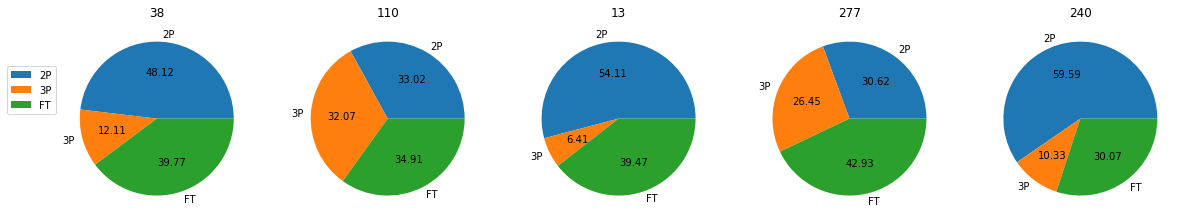

In [25]:
# 2.1 Analysis of total points' of top 5 players with the most points
pd.options.mode.chained_assignment = None  # default='warn'

top5_players = data[{'Player', '3P', '2P', 'FT', 'PTS', 'Tm'}]
top5_players = top5_players[top5_players.Tm != "TOT"] # Exclude TOT as that row is for total pts of a player
top5_players['TOTAL'] = top5_players.groupby('Player')['PTS'].transform('sum')

top5_players = top5_players.drop_duplicates('Player', keep='last')
top5_players = top5_players.sort_values(by=['TOTAL'], ascending=False).head(5)
print(top5_players)
# Making dataframe from required pts columns
df = top5_players[['2P', '3P', 'FT']].copy()

fig, axes = plt.subplots(1,5, figsize=(20,13))
for ax, idx in zip(axes, df.index):
    ax.pie(df.loc[idx], labels=df.columns, autopct='%.2f')
    ax.set(ylabel='', title=idx, aspect='equal')

axes[0].legend(bbox_to_anchor=(0, 0.8))
plt.show()

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


In [26]:
# Code goes after this line by adding cells


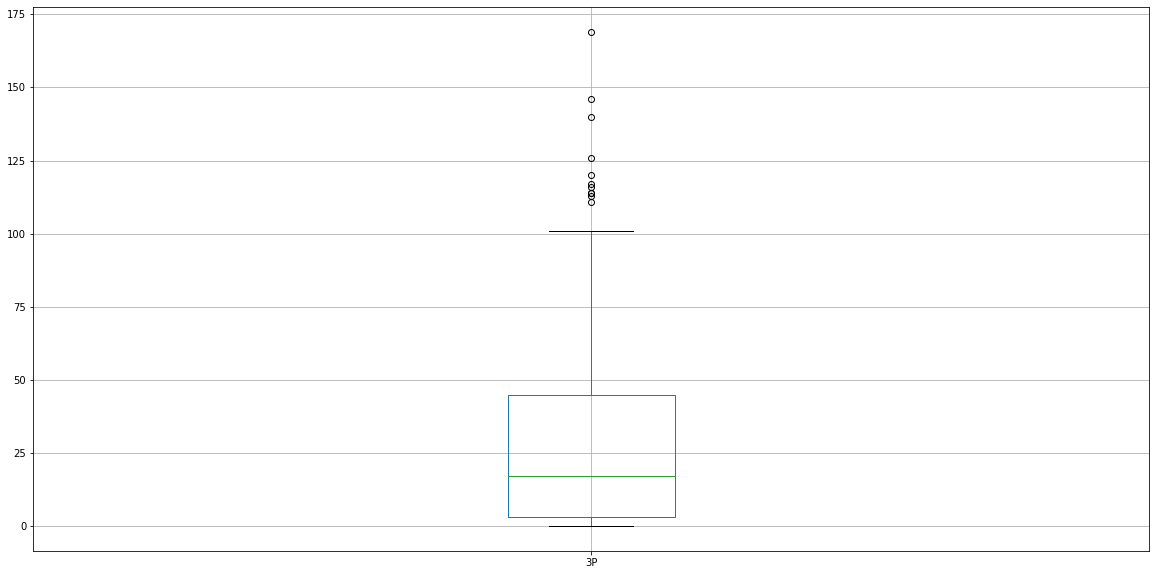

In [11]:
data['expected_3P%'] = data['3P'] / data['3PA']
#data['3P%'].dropna().plot(kind="box")
#data.dropna().boxplot(column='3PA', by = '3PA')
#data['3PA'].dropna().plot(kind="box")
#data['3P%'].dropna().plot(kind="box")
boxplot = data.boxplot(column=['3P'], figsize=(20,10))

# data.plot.scatter(x='3PA',
#                   y='3P',
#                   c='LightBlue')
# data.plot(figsize=(300,100))

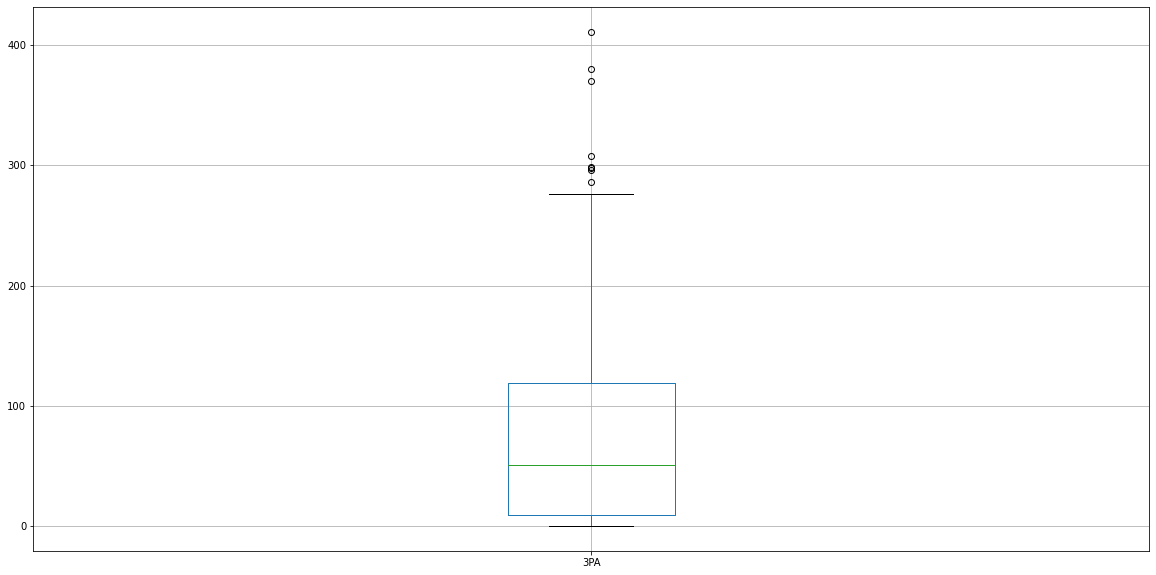

In [12]:
boxplot1 = data.boxplot(column=['3PA'], figsize=(20,10))

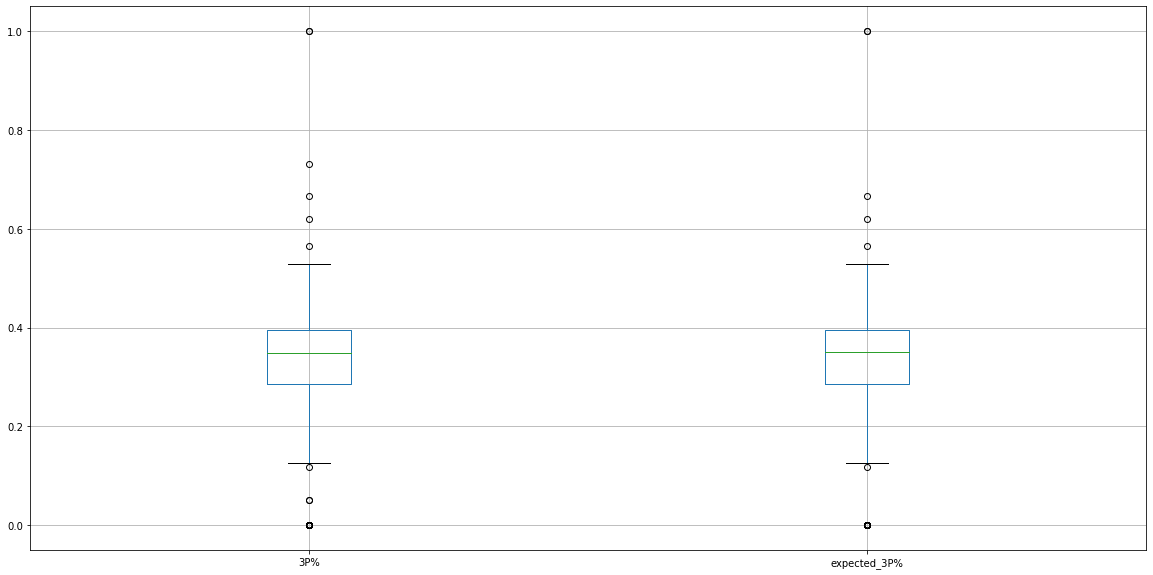

In [13]:
boxplot2 = data.boxplot(column=['3P%', 'expected_3P%'], figsize=(20,10))

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


In [14]:
# Code goes after this line by adding cells


<AxesSubplot:title={'center':'PTS'}, xlabel='Age'>

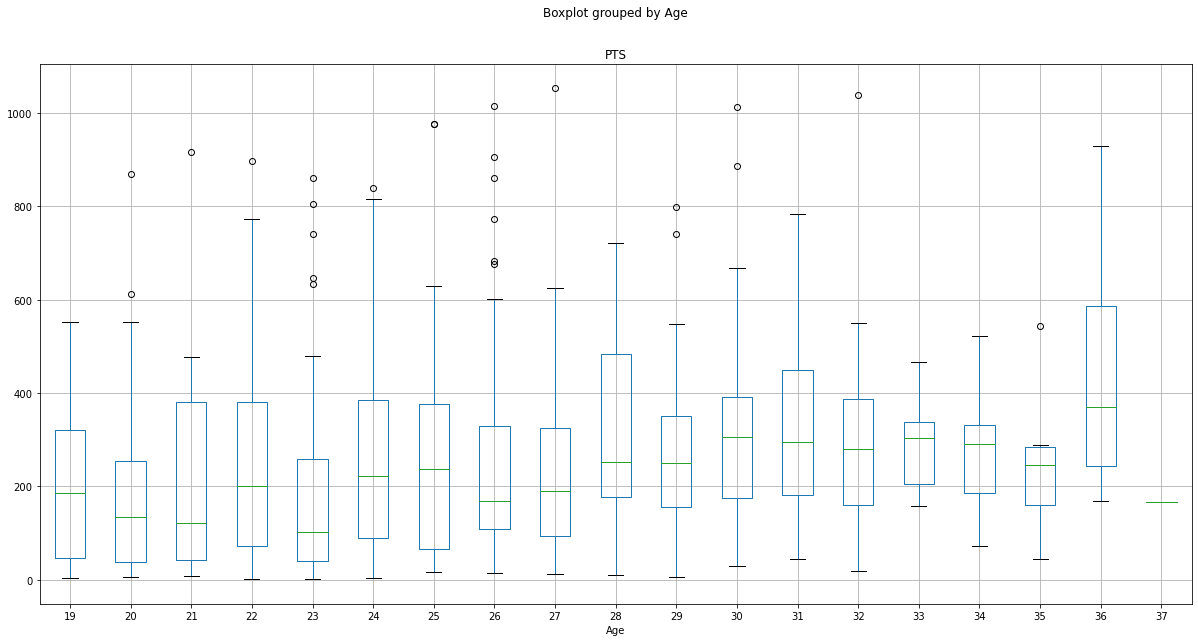

In [15]:
data.dropna().boxplot(column='PTS', by='Age', figsize = (20,10))

<AxesSubplot:xlabel='PTS', ylabel='FTA'>

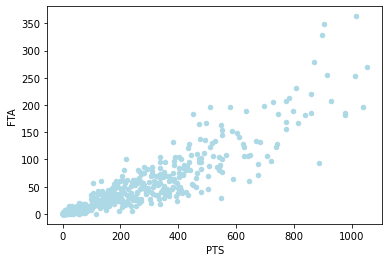

In [50]:
data.plot.scatter(x='PTS',
                  y='FTA',
                  c='LightBlue')

<AxesSubplot:xlabel='PTS', ylabel='FT'>

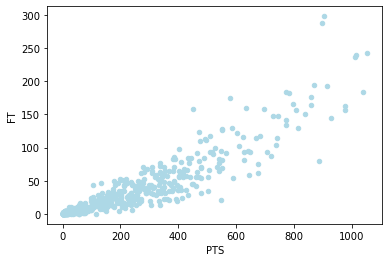

In [53]:
data.plot.scatter(x='PTS',
                  y='FT',
                  c='LightBlue')

Text(0.5, 0, '')

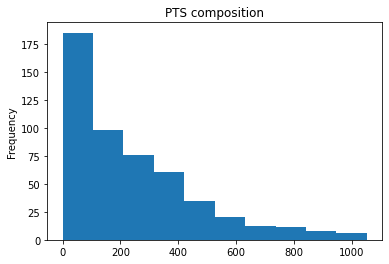

In [65]:
data['PTS'].plot(kind='hist', bins=10)
plt.title('PTS composition')
plt.xlabel('')